In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

E:\anaconda3\envs\nlp2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


            Orig_1    Rule_1   First_1  Second_1   Third_1    Orig_2  \
Orig_1    1.000000  0.985884  0.997289  0.836562  0.993779  0.462466   
Rule_1    0.985884  1.000000  0.986431  0.846993  0.983883  0.417969   
First_1   0.997289  0.986431  1.000000  0.838179  0.997273  0.442575   
Second_1  0.836562  0.846993  0.838179  1.000000  0.847306  0.310243   
Third_1   0.993779  0.983883  0.997273  0.847306  1.000000  0.444947   
Orig_2    0.462466  0.417969  0.442575  0.310243  0.444947  1.000000   
Rule_2    0.459689  0.414169  0.439597  0.303833  0.442081  0.994018   
First_2   0.461058  0.417714  0.442121  0.309711  0.444748  0.995302   
Second_2  0.253392  0.222773  0.230049  0.335466  0.231220  0.598944   
Third_2   0.452122  0.410564  0.432295  0.316334  0.434407  0.995053   

            Rule_2   First_2  Second_2   Third_2  
Orig_1    0.459689  0.461058  0.253392  0.452122  
Rule_1    0.414169  0.417714  0.222773  0.410564  
First_1   0.439597  0.442121  0.230049  0.432295  
Sec

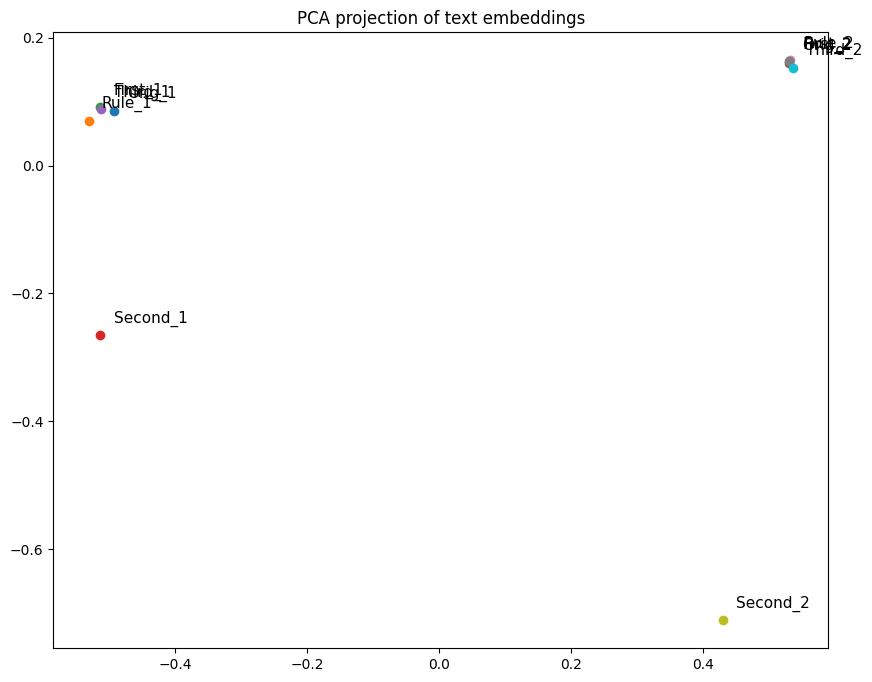

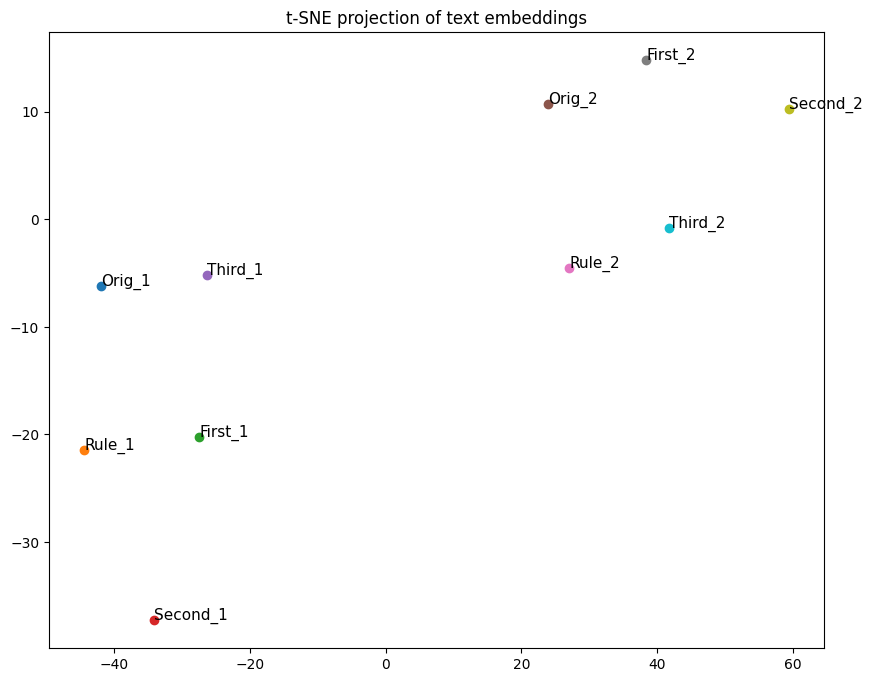

In [1]:
df = pd.read_csv("pipeline_outputs.csv")
rule_df = pd.read_csv("rule_based_outputs.csv")

df = pd.merge(rule_df, df, on="Text_ID", how="outer")

model = SentenceTransformer('all-MiniLM-L6-v2')

texts = []
labels = []
for i, row in df.iterrows():
    texts.extend([
        row["Original_Text_x"],
        row["Rule_Based_Rewrite"],
        row.get("First_Model_Grammar", ""),
        row.get("Second_Model_Summary", ""),
        row.get("Third_Model_Grammar", "")
    ])
    labels.extend([
        f"Orig_{row['Text_ID']}",
        f"Rule_{row['Text_ID']}",
        f"First_{row['Text_ID']}",
        f"Second_{row['Text_ID']}",
        f"Third_{row['Text_ID']}"
    ])

embeddings = model.encode(texts)

cosine_matrix = cosine_similarity(embeddings)
cosine_df = pd.DataFrame(cosine_matrix, index=labels, columns=labels)
print(cosine_df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

plt.figure(figsize=(10,8))
for i, label in enumerate(labels):
    x, y = pca_result[i]
    plt.scatter(x, y)
    plt.text(x+0.02, y+0.02, label, fontsize=11)
plt.title("PCA projection of text embeddings")
plt.show()

tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_result = tsne.fit_transform(embeddings)

plt.figure(figsize=(10,8))
for i, label in enumerate(labels):
    x, y = tsne_result[i]
    plt.scatter(x, y)
    plt.text(x+0.02, y+0.02, label, fontsize=11)
plt.title("t-SNE projection of text embeddings")
plt.show()